In [144]:
import pandas as pd
gc = pd.read_csv('../data/GitHub_GC_Checks.csv')
list(gc)

['Participant_ID',
 'StartDate',
 'EndDate',
 'Status',
 'IPAddress',
 'Progress',
 'Duration__in_seconds_',
 'Finished',
 'RecordedDate',
 'ResponseId',
 'LocationLatitude',
 'LocationLongitude',
 'UserLanguage',
 'Module',
 'Age',
 'Are you a current GitHub user?',
 'Gender',
 'Sexual Orientation',
 'Sexual Orientation (Text)',
 'Ethnic Identity/Race',
 'Ethnic Identity/Race (Text)',
 'National Status',
 'English Fluency',
 'Highest Level of Formal Education',
 'Employment Status',
 'Employment Status (Text)',
 'Annual Household Income',
 'GitHub_Start Time',
 'GitHub Use Frequency',
 'Project Scale',
 'How often do you try to use Open Source Options?',
 'Development Work Outside of GitHub',
 'Development Work Outside of GitHub (Text)',
 'Have you or are you being paid to develop software?',
 'How often do you write or directly contribute to the development of software?',
 'Which of the following programming languages do you use?',
 'Programming Languages (Text)',
 'Project Centers o

In [145]:
gc = gc[['Participant_ID', 'Concept', 'Rating_Total', 'Duration', 
         'AvgSkip', 'AvgDir1', 'AvgDir0', 'AvgDir_1', 
         'Evaluation', 'Potency', 'Activity']]
gc['Duration per concept'] = gc['Duration'] / gc['Rating_Total']
# Average Time Per Concept (Duration/Rating_Total) < 2 seconds 

# AverageSkip  <.35 (0.032)

# AverageDir (Right) >.85

# AverageDir0 (Neutral) >.85

# AverageDir_1 (Left) > .85

In [143]:
t = gc[gc['Concept'] == 'quiet']
len(set(t['Participant_ID'].tolist()))

50

In [150]:
t = gc[gc['AvgSkip'] < 0.35]
len(set(t['Participant_ID'].tolist()))

498

In [153]:
mask_count = (gc['Duration per concept'] < 2) * 1 + (gc['AvgSkip'] < 0.35) * 1 \
+ (gc['AvgDir1'] > 0.9) * 1 + (gc['AvgDir0'] > 0.85) * 1 + (gc['AvgDir_1'] > 0.85) * 1

(array([  492.,     0.,     0.,     0.,     0., 19523.,     0.,     0.,
            0.,  9634.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

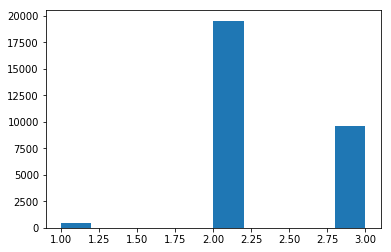

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(mask_count)

In [50]:
def plot(word):
    pd = _gc.loc[_gc['Concept'] == word]
    print(word)
    print('count:')
    print(pd.shape[0])
    print('mean: ')
    print(pd.mean()[1:])
    print('std: ')
    print(pd.std()[1:])
    haxis = ['Evaluation', 'Potency', 'Activity']
    fig, axn = plt.subplots(1, 3, sharex=True, sharey=True)
    fig.set_size_inches(15, 4)
    for i, ax in enumerate(axn.flat):
        sns.distplot(pd[haxis[i]], ax=ax)
    print('======================================')

In [117]:
name_list = set(gc[mask_count < 3]['Participant_ID'])
print(sorted(name_list))
print(len(name_list))
_gc = gc[gc['Participant_ID'].isin(name_list)]
_gc = _gc[['Participant_ID', 'Concept', 'Evaluation', 'Potency', 'Activity']]

[1, 2, 4, 8, 9, 10, 12, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 41, 43, 46, 47, 48, 50, 52, 57, 59, 60, 62, 64, 68, 69, 70, 74, 75, 76, 79, 80, 81, 83, 84, 85, 87, 88, 89, 90, 91, 93, 94, 99, 100, 102, 103, 104, 105, 106, 107, 108, 110, 111, 114, 115, 116, 117, 119, 122, 123, 124, 125, 127, 132, 133, 134, 139, 140, 141, 142, 144, 147, 148, 149, 150, 152, 153, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 168, 170, 171, 172, 173, 174, 175, 177, 178, 179, 182, 185, 187, 188, 189, 190, 191, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 204, 206, 207, 209, 210, 213, 215, 216, 219, 220, 221, 224, 225, 227, 228, 229, 230, 231, 233, 234, 235, 236, 238, 239, 241, 243, 244, 247, 248, 249, 250, 251, 252, 254, 256, 259, 260, 261, 262, 263, 264, 265, 266, 267, 270, 271, 272, 275, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 297, 298, 300, 301, 302, 306, 307, 308, 309, 310, 311, 315, 316, 

In [130]:
import numpy as np
df = _gc.groupby("Concept")["Evaluation", "Potency", "Activity"].agg([np.mean, np.std])
header = ['Evaluation_mean', 'Evaluation_std', 'Potency_mean', 'Potency_std', 'Activity_mean', 'Activity_std']
print(df.to_csv(header=header, path_or_buf='GitHub_Aggregated.csv'))

None


quiet
count:
37
mean: 
Evaluation    0.913514
Potency       0.183784
Activity     -0.827027
dtype: float64
std: 
Evaluation    1.621755
Potency       1.606154
Activity      1.987272
dtype: float64


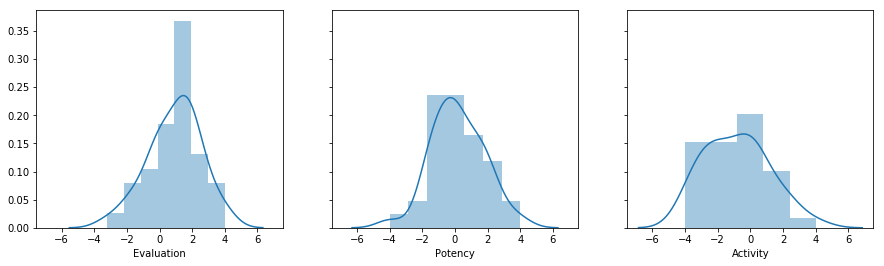

In [113]:
plot('quiet')

inactive
count:
32
mean: 
Evaluation    0.028125
Potency      -0.015625
Activity     -0.156250
dtype: float64
std: 
Evaluation    2.291954
Potency       2.247452
Activity      2.420602
dtype: float64


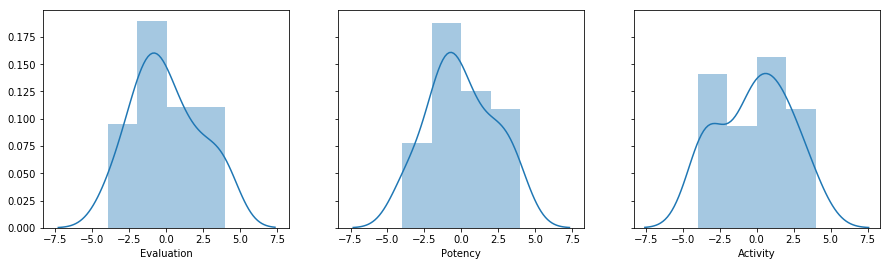

In [114]:
plot('inactive')

happy
count:
25
mean: 
Evaluation    2.568
Potency       2.248
Activity      1.564
dtype: float64
std: 
Evaluation    1.799935
Potency       1.715401
Activity      1.968265
dtype: float64


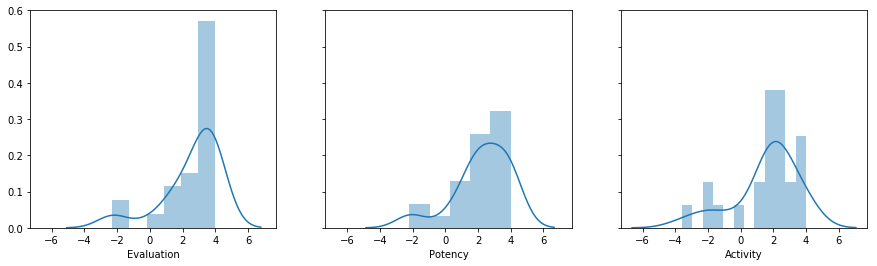

In [99]:
plot('happy')

motivated
count:
28
mean: 
Evaluation    2.053571
Potency       2.128571
Activity      1.889286
dtype: float64
std: 
Evaluation    1.566190
Potency       1.600893
Activity      1.352457
dtype: float64


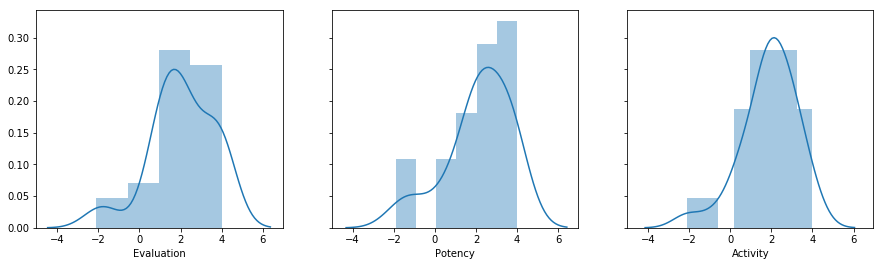

In [75]:
plot('motivated')

dominant
count:
34
mean: 
Evaluation    1.502941
Potency       2.008824
Activity      1.552941
dtype: float64
std: 
Evaluation    1.701601
Potency       1.882675
Activity      1.837362
dtype: float64


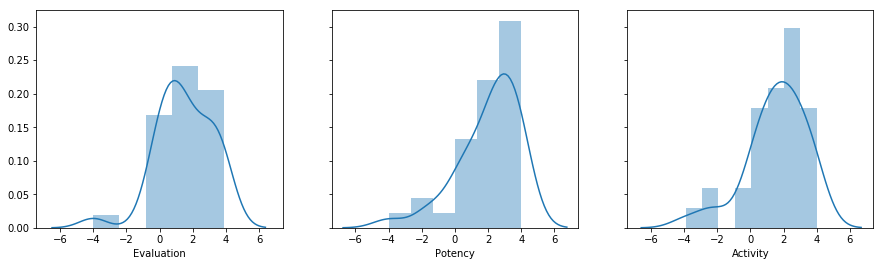

In [76]:
plot('dominant')